참고:혼자 공부하는 머신러닝 + 딥러닝(한빛미디어)

### scikit-learn

+ `KNeighborclassifier()`
+ `fit()`: 훈련할 특성과 label을 전달하여 모델을 훈련시키는 매서드
+ `predict()`: 새로운 데이터를 전달했을 때 해당 데이터의 label을 예측하는 매서드
+ `score()`: 모델이 예측한 정확도를 비율로 반환

# K-최근접 이웃(K-nearest neighbors): K-NN

* 단순한 알고리즘이기 때문에 속도가 빠르다.
* 어떤 데이터의 답을 구할때 `근접한 주위 데이터` 즉, `가장 가까운 직선거리`로 현재 데이터를 판단하는 알고리즘.

k-nn알고리즘의 단점: 데이터가 아주 많을때 사용이 곤란할 수 있다.

* 참고하는 데이터 수는 5개가 기본으로 설정되어 있다. 

참고 데이터 수를 49개로 바꾸고 싶다면 `kn49 = KNeighborsClassifier(n_neighbors = 49)`로 객체 할당



##  데이터 전처리

In [1]:
# 빙어 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
# 도미 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import matplotlib.pyplot as plt

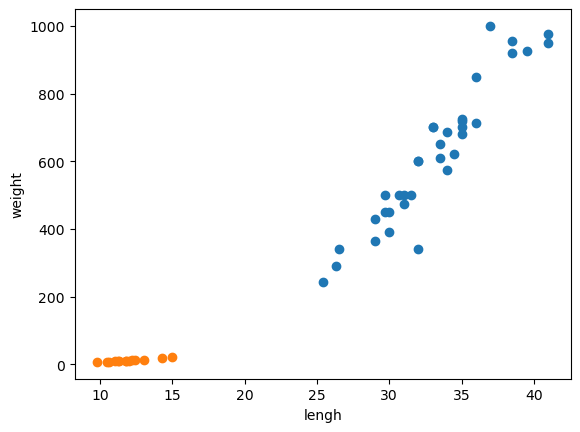

In [5]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel("lengh")
plt.ylabel("weight")
plt.show()

In [11]:
# 값을 합치는 게 아니라 하나의 리스트로 만들어주는 작업
# length 리스트와 weight 리스트

length = bream_length + smelt_length
weight = bream_weight + smelt_length

fishdata = [[l,w] for l,w in zip(length,weight)]
fishdata[:5] # scikit_learn에 넣기위해 2차원 리스트로 만듦

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

(+) 다음의 과정을 zip()이 아닌 numpy를 사용하여 구현할 수 있다.


fishdata = `np.column_stack((length, weight))`

In [12]:
# 2차원 리스트의 데이터가 도미[1]인지 빙어[0]인지 지정

fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


(+) 다음의 과정을 numpy를 사용하여 구현할 수 있다.


fish_target = `np.concatenate((np.ones(35), np.zeors(14)))`


* numpy로 처리하면 데이터를 list가 아닌 배열로 처리하기 때문에 데이터가 큰 작업에 효율적이다.

##  사이킷런을 사용하여 k-nn구현하기

k-최근접 알고리즘을 이용해 어던 데이터가 도미인지 방어인지 구분하는 머신러닝 프로그램을 만들어보자.

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#k- 최근접 이웃 알고리즘 모델 만들기


kn = KNeighborsClassifier()
kn.fit(fishdata, fish_target)

KNeighborsClassifier()

In [18]:
# 모델 성능 평가

kn.score(fishdata, fish_target)    # 정확도

1.0

같은 데이터 fishdata를 넣어주기 때문에 모델이 모두 fish_target을 맞춰 1를 반환.

In [ ]:
새로운 데이터의 정답 예측: `predict()` 사용

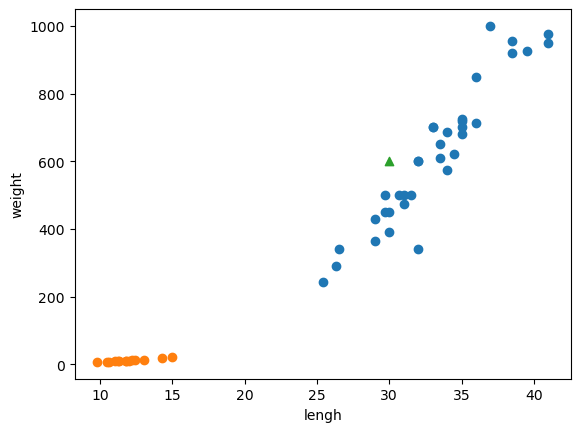

In [23]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker='^')
plt.xlabel("lengh")
plt.ylabel("weight")
plt.show()

In [24]:
kn.predict([[30,600]])

# 도미라고 예측

array([1])

# train_data와 test_data로 나눠서 사용하기


#### (1)  `numpy` 사용하여 데이터셋 나누기

- `seed()`: 난수생성을 위한 초깃값 설정. 초깃값이 같으면 동일한 난수 생성
- `arange()`: 0부터 n-1 까지의 1의 간격의 배열을 반환
 

In [26]:
import numpy as np

In [55]:
input_arr = np.array(fishdata)
target_arr = np.array(fish_target)

print(input_arr.shape) # 샘플 수, 특성 수

(49, 2)


In [56]:
fishdata[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [57]:
input_arr[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

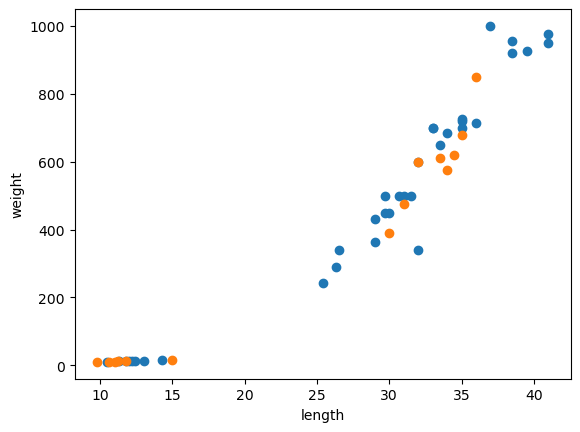

In [60]:
# 인덱스 순서 섞기
np.random.seed(42)   # 랜덤 함수 결과값 고정
index = np.arange(49) # 0부터 48까지 1씩 증가 배열 생성
np.random.shuffle(index) # 순서 무작위 섞기


# train_data
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# test_data
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
            

In [64]:
# 모델 학습

kn = KNeighborsClassifier()
kn.fit(train_input,train_target)


print("모든 생선을 맞췄습니다. 정확도 1")
kn.score(test_input,test_target)


모든 생선을 맞췄습니다. 정확도 1


1.0

In [67]:
print(f"모델의 예측값: {kn.predict(test_input)}")
print(f"실제 관측값:   {test_target}")


모델의 예측값: [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
실제 관측값:   [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


### (2) 사이킷런으로 데이터셋 나누기

from sklearn.model_selection import `train_test_split`

In [ ]:
# 데이터셋을 list가 아닌 배열로 처리

In [80]:
fishdata = np.column_stack((length, weight))
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [71]:
from sklearn.model_selection import train_test_split

In [84]:
# random_state는 random.seed()와 유사 
# stratify: 해당 옵션에 할당하는 클래스 비율에 맞게 데이터셋을 나눈다. 

train_input,test_input, train_target, test_target = train_test_split(fishdata, 
                                                                     fish_target,
                                                                     stratify = fish_target,
                                                                     random_state = 42)


In [85]:
# 기본적으로 25%를 테스트 세트로 떼어냄

print(train_input.shape, test_input.shape)

(36, 2) (13, 2)
